In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os, glob

In [4]:
from ipynb.fs.defs.Mosquitodataset1_Yearlybatchdata import yearlyfile, batch1, batchdf1

In [5]:
mos = yearlyfile("Mosquito yearly.xlsx",'U-C')[0]
mosyr = yearlyfile("Mosquito yearly.xlsx",'U-C')[1]
batch = batch1(mosyr,mos)
batchdf = batchdf1(mos)

In [6]:
batch

[45, 11, 25, 4, 99, 15, 4, 15, 10, 37, 41, 5, 8, 7, 8, 23, 8, 4]

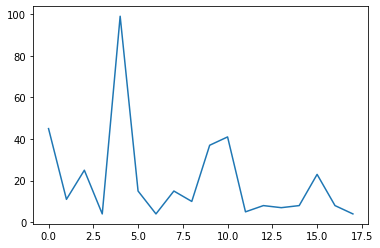

In [7]:
plt.plot(batch)

In [8]:
maxyr = 2002+batch.index(max(batch))
minyr = 2002+batch.index(min(batch))

In [9]:
##Analysis for when maximum and minimum no. of batches were found in 2006 and 2005 resp.
maxb = batchdf[batchdf['date'].dt.year==maxyr]
minb=batchdf[batchdf['date'].dt.year==minyr]

In [10]:
##Analysis of local maximas - yr 2002, 2012,2018
b2002 = batchdf[batchdf['date'].dt.year==2002]
b2012 = batchdf[batchdf['date'].dt.year==2012]
b2018 = batchdf[batchdf['date'].dt.year==2018]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

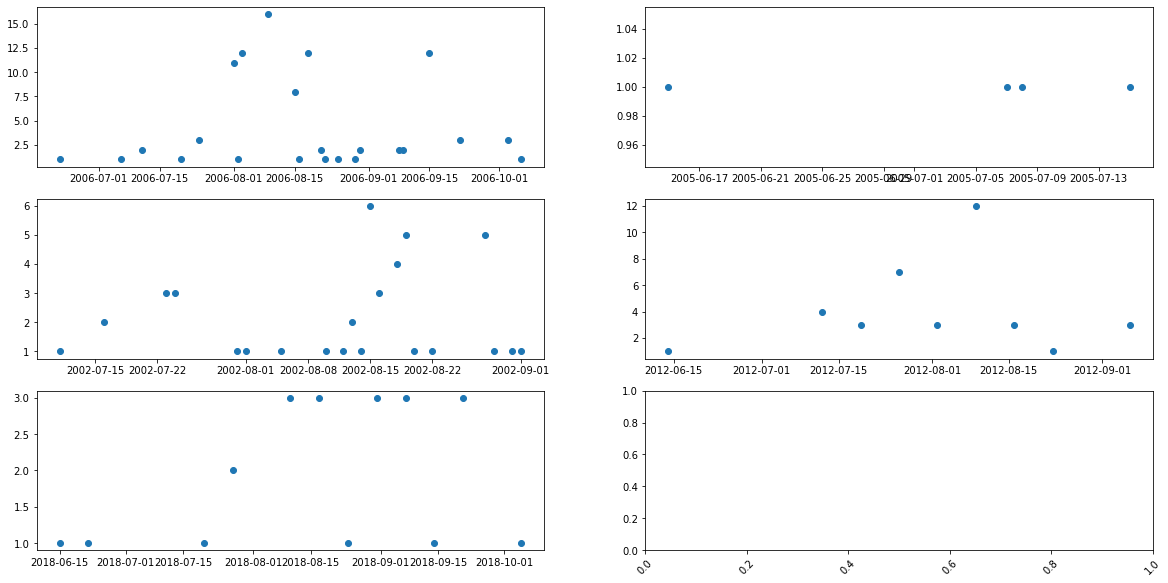

In [11]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,10))
ax1.scatter(maxb['date'],maxb['batches'])
plt.xticks(rotation =45)
ax2.scatter(minb['date'],minb['batches'])
plt.xticks(rotation =45)
ax3.scatter(b2002['date'],b2002['batches'])
plt.xticks(rotation =45)
ax4.scatter(b2012['date'],b2012['batches'])
plt.xticks(rotation =45)
ax5.scatter(b2018['date'],b2018['batches'])
plt.xticks(rotation =45)

In [12]:
csv=[pd.read_csv(f) for f in glob.glob("/data/dhence/a/pborse2/inputdata/ISWS_data/Champaign/*.csv")]

In [13]:
from ipynb.fs.full.ISWSdataset_Champaign import aprnov
climmin = aprnov(csv)[6] 
climmax = aprnov(csv)[7]

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [14]:
climmax

,DAY,MAX AIR TEMP oF,MIN AIR TEMP oF,AVG AIR TEMP oF,TOTAL PRECIP oF,MAX REL HUM %
date,,,,,,
2006-04-01,1.0,84.6,56.3,65.8,0.0,98.4
2006-04-02,2.0,75.3,54.1,63.0,0.0,88.2
2006-04-03,3.0,86.3,50.6,67.1,0.0,87.9
2006-04-04,4.0,70.8,46.7,57.8,0.0,82.0
2006-04-05,5.0,61.4,38.0,50.2,0.0,79.9
...,...,...,...,...,...,...
2006-11-22,26.0,42.6,30.2,34.8,0.0,86.1
2006-11-23,27.0,37.2,20.5,29.1,0.0,89.5
2006-11-24,28.0,46.6,22.3,32.2,0.0,97.1


In [15]:
#Finding threshold ppt when mosquito batches appear 
from datetime import timedelta
from datetime import date
from datetime import datetime
def lag(mosdf,climdf,yr):
    lagdays=[]
    lim = (mosdf['date'].iloc[0].date()-date(yr,4,1)).days
    for j in range(1,lim+1):
        laglist=[]
        y=yr
        td = timedelta(j)
        clim1 = climdf[climdf.index.isin(mosdf['date']-td)]['TOTAL PRECIP oF']
        data = zip(clim1.values,mosdf['batches'].values)
        laglist.append(list(zip(clim1.values,mosdf['batches'].values)))
        #print(list(zip(ppt.values,batch['batches'].values)))
        laglist = sum(laglist,[])
        #print(laglist)
        lag = pd.DataFrame(laglist,columns = ['lag'+str(j), 'batch'])        
        lagdays.append(lag)
    return lagdays

In [16]:
lagdmin = lag(minb,climmin,minyr) #Year when minimum no. of batches were found
lagdmax= lag(maxb,climmax,maxyr) #Year when max no. of batches were found

In [17]:
def lagconcat(df):
    for i in df:
        i = i.set_index('batch',inplace=True)
    lagdf = pd.concat(df,axis=1,sort=False)
    lagdf = lagdf.reset_index()
    return lagdf


In [18]:
maxlagdf = lagconcat(lagdmax)
minlagdf = lagconcat(lagdmin)

In [19]:
lagconcat((lag(b2002,aprnov(csv)[3],2002)))

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,batch,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100,lag101
0,1,0.00,0.53,0.44,4.10,0.00,0.00,0.00,0.25,0.01,...,0.00,0.00,0.03,0.25,0.00,0.00,0.01,0.92,0.48,0.03
1,2,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.44,4.10,...,0.01,0.28,0.23,0.00,0.00,0.00,0.00,0.03,0.25,0.00
2,3,0.78,1.25,0.06,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.28,0.23
3,3,0.00,0.78,1.25,0.06,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.28
4,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.78,...,0.01,0.06,1.09,0.51,0.00,0.00,0.11,0.01,0.01,0.00
5,1,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.01,0.06,1.09,0.51,0.00,0.00,0.11,0.01,0.01
6,1,0.00,0.04,0.01,0.00,0.31,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.02,0.01,0.06,1.09,0.51,0.00
7,1,0.00,0.00,0.00,0.20,0.00,0.00,0.04,0.01,0.00,...,0.55,0.20,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.02
8,1,0.02,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.04,...,0.05,0.29,0.55,0.20,0.61,0.00,0.00,0.00,0.00,0.00
9,2,0.03,0.02,0.00,0.00,0.00,0.00,0.20,0.00,0.00,...,0.00,0.05,0.29,0.55,0.20,0.61,0.00,0.00,0.00,0.00


In [20]:
maxlagdf

,batch,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag73,lag74,lag75,lag76,lag77,lag78,lag79,lag80,lag81,lag82
0,1,0.00,0.00,0.04,0.00,0.00,0.00,0.09,0.71,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,...,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.00,0.18,0.44
2,2,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,...,0.15,0.05,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.18
3,1,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.37,...,0.00,0.59,0.00,0.00,0.02,0.01,0.01,0.45,0.82,0.15
4,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.59,0.00,0.00,0.02,0.01
5,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,12,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,16,0.00,0.00,0.66,0.00,0.00,0.00,0.65,0.00,0.00,...,0.00,0.58,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,8,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.66,...,0.00,0.10,0.01,0.20,0.00,0.51,0.00,0.58,0.46,0.00


In [23]:
def threshold(lagdf):
    b1=[]
    b25=[]
    b6=[]
    b1p0=[]
#corlist=[]
    #from scipy.stats.stats import pearsonr
    for k in range(1,len(lagdf.columns)-21,21):
        batch1ppt=[] # Sum of rain amounts with different lagdays when the 1 batch of mosquitoes is found
        batch2_5ppt=[]
        batch6ppt=[]
        #print(k)
        #batch1meanppt=[] # Mean rain amount for each lagdays (1-14) when batch ==1
        batch1ppt0 = [] # No. of times 1 batch occured with zero ppt
        for i in range(k,k+21):  ### Analysis for lagperiod of subsequent 3 weeks
            sordf =lagdf.sort_values(by='batch')    
            #cor,_ = pearsonr(sordf[sordf.columns[i]],sordf['batch'])
            #corlist.append(cor)
            mylist = [sordf[sordf['batch']==1][sordf.columns[j]].values*25.4 for j in range(k,i+1)]
            mylist2 = [sordf[(sordf['batch']>1) & (sordf['batch']<6)][sordf.columns[j]].values*25.4 for j in range(k,i+1)]
            mylist3 = [sordf[sordf['batch']>=6][sordf.columns[j]].values*25.4 for j in range(k,i+1)]
            #batch1ppt.append(sordf[sordf['batch']==1][sordf.columns[i]].values)
            batch1ppt.append(sum(map(np.array, mylist)))
            batch2_5ppt.append(sum(map(np.array, mylist2)))
            batch6ppt.append(sum(map(np.array, mylist3)))
            #batch1meanppt.append(sordf[(sordf['batch']==1) & (sordf[sordf.columns[0]]!=0)][sordf.columns[0]].mean())
            batch1ppt0.append(len(np.where(sum(map(np.array, mylist))==0)[0]))
        b1.append(batch1ppt)
        b25.append(batch2_5ppt)
        b6.append(batch6ppt)
        b1p0.append(batch1ppt0)
    return b1,b25,b6,b1p0
def frqdistlagdays(df,day):
    plt.hist(batch1ppt[day])
    plt.hist(batch2_5ppt[day])
    plt.hist(batch6ppt[day])
    plt.legend(['Batch=1','Batch=2-5','Batch>=6'])

In [119]:
len(threshold(maxlagdf))

4

In [24]:
### Calculating the maximum and min cumulative rainfall amount associated with occurance of batches for all lagdays
max1 = [np.max(threshold(maxlagdf)[0][i],axis=1) for i in range(len(threshold(maxlagdf)[0]))]
max25 = [np.max(threshold(maxlagdf)[1][i],axis=1) for i in range(len(threshold(maxlagdf)[1]))]
max6 = [np.max(threshold(maxlagdf)[2][i],axis=1) for i in range(len(threshold(maxlagdf)[2]))]
min1 = [np.min(threshold(maxlagdf)[0][i],axis=1) for i in range(len(threshold(maxlagdf)[0]))]
min25 = [np.min(threshold(maxlagdf)[1][i],axis=1) for i in range(len(threshold(maxlagdf)[1]))]
min6 = [np.min(threshold(maxlagdf)[2][i],axis=1) for i in range(len(threshold(maxlagdf)[2]))]
mean1= [np.mean(threshold(maxlagdf)[0][i],axis=1) for i in range(len(threshold(maxlagdf)[0]))]
mean25 = [np.mean(threshold(maxlagdf)[1][i],axis=1) for i in range(len(threshold(maxlagdf)[1]))]
mean6 = [np.mean(threshold(maxlagdf)[2][i],axis=1) for i in range(len(threshold(maxlagdf)[2]))]

Text(0.5, 0, 'Lagdays')

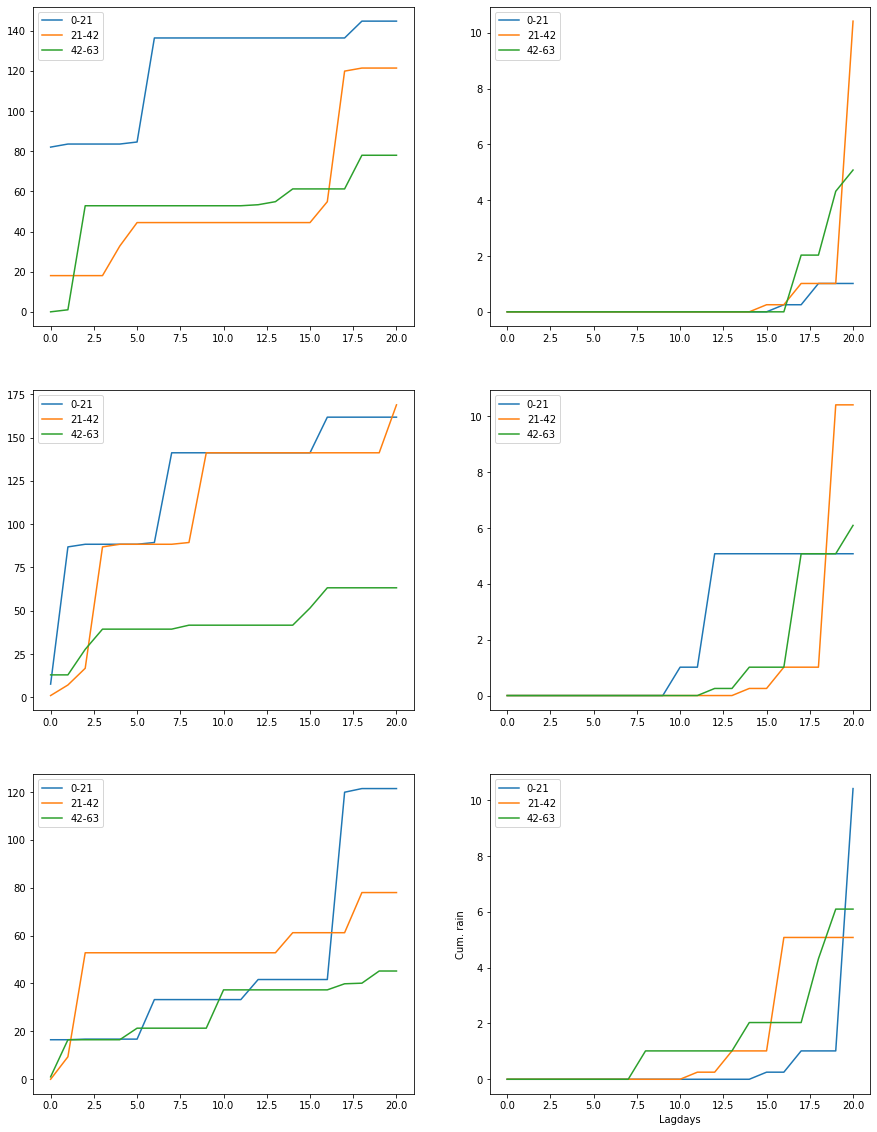

In [25]:
fig, axes = plt.subplots(3,2,figsize=(15,20))
ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()
for i in range(len(mean1)):
    ax1.plot(max1[i])
    ax1.legend(['0-21','21-42','42-63'])
    ax2.plot(min1[i])
    ax2.legend(['0-21','21-42','42-63'])
    ax3.plot(max25[i]) 
    ax3.legend(['0-21','21-42','42-63'])
#     ax1.plot(mean1[i])
#     ax2.plot(mean25[i])
#     ax3.plot(mean6[i])
    ax4.plot(min25[i])
    ax4.legend(['0-21','21-42','42-63'])
    ax5.plot(max6[i]) 
    ax5.legend(['0-21','21-42','42-63'])
    ax6.plot(min6[i])
    ax6.legend(['0-21','21-42','42-63'])

plt.ylabel('Cum. rain')
plt.xlabel('Lagdays')
# plt.legend(['1','2-5','>=6'])
## X axis repsresents the lagdays as per calculated in the cell above - lagdays 1-21

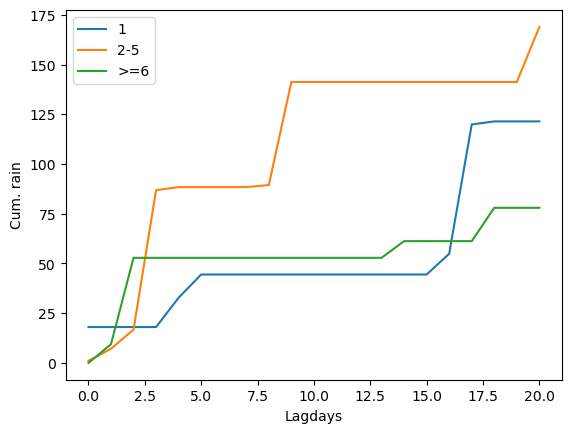

In [36]:
plt.plot(max1)
plt.plot(max25)
plt.plot(max6)
plt.ylabel('Cum. rain')
plt.xlabel('Lagdays')
plt.legend(['1','2-5','>=6'])
## X axis repsresents the lagdays as per calculated in the cell above - lagdays 22-42

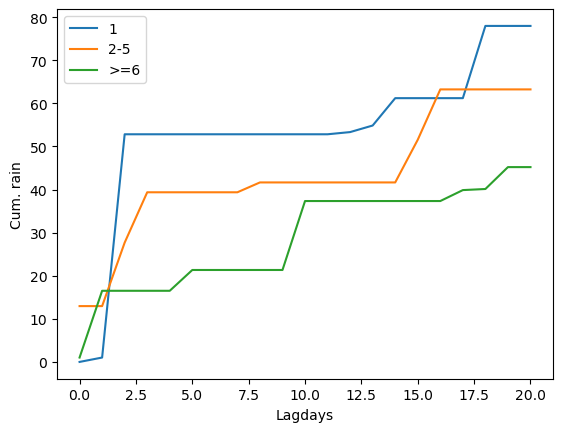

In [39]:
plt.plot(max1)
plt.plot(max25)
plt.plot(max6)
plt.ylabel('Cum. rain')
plt.xlabel('Lagdays')
plt.legend(['1','2-5','>=6'])
## X axis repsresents the lagdays as per calculated in the cell above - lagdays 43-63

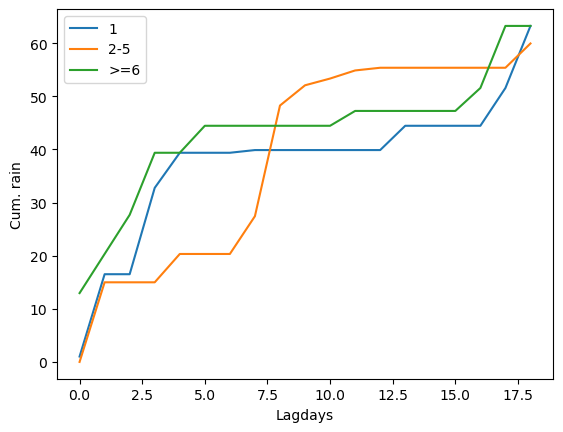

In [42]:
plt.plot(max1)
plt.plot(max25)
plt.plot(max6)
plt.ylabel('Cum. rain')
plt.xlabel('Lagdays')
plt.legend(['1','2-5','>=6'])
## X axis repsresents the lagdays as per calculated in the cell above - lagdays 64-82

In [129]:
##Analysis of local maxima yrs
thr2002 = threshold(lagconcat((lag(b2002,aprnov(csv)[3],2002))))
thr2012 = threshold(lagconcat((lag(b2012,aprnov(csv)[13],2012))))
thr2018= threshold(lagconcat((lag(b2018,aprnov(csv)[19],2018))))

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [135]:
def minmax(df): ###Arguments are threshold dataframes thr2002, etc
    maxy1 = [np.max(df[0][i],axis=1) for i in range(len(df[0]))]
    maxy25 = [np.max(df[1][i],axis=1) for i in range(len(df[1]))]
    try:
        maxy6 = [np.max(df[2][i],axis=1) for i in range(len(df[2]))]
        miny6 = [np.min(df[2][i],axis=1) for i in range(len(df[2]))]
    except:
        maxy6=[]
        miny6=[]
    miny1 = [np.min(df[0][i],axis=1) for i in range(len(df[0]))]
    miny25 = [np.min(df[1][i],axis=1) for i in range(len(df[1]))]
    return maxy1,maxy25,maxy6,miny1,miny25,miny6

In [147]:
def plots(df):
    fig, axes = plt.subplots(3,2,figsize=(15,20))
    ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()
    for i in range(len(minmax(df)[0])):
        ax1.plot(minmax(df)[0][i])
        ax1.legend([*range(len(minmax(df)[0]))])
        ax2.plot(minmax(df)[3][i])
        ax2.legend([*range(len(minmax(df)[0]))])
        ax2.set_title('batch=1')
        ax3.plot(minmax(df)[1][i]) 
        ax3.legend([*range(len(minmax(df)[1]))])
        ax4.plot(minmax(df)[4][i])
        ax4.set_title('batch=2-5')
        ax4.legend([*range(len(minmax(df)[1]))])
        try:
            ax5.plot(minmax(df)[2][i]) 
            ax5.legend([*range(len(minmax(df)[2]))])
            ax6.plot(minmax(df)[5][i])
            ax6.legend([*range(len(minmax(df)[2]))])
            ax6.set_title('batch=6')
        except:
            pass
    plt.ylabel('Cum. rain')
    plt.xlabel('Lagdays')

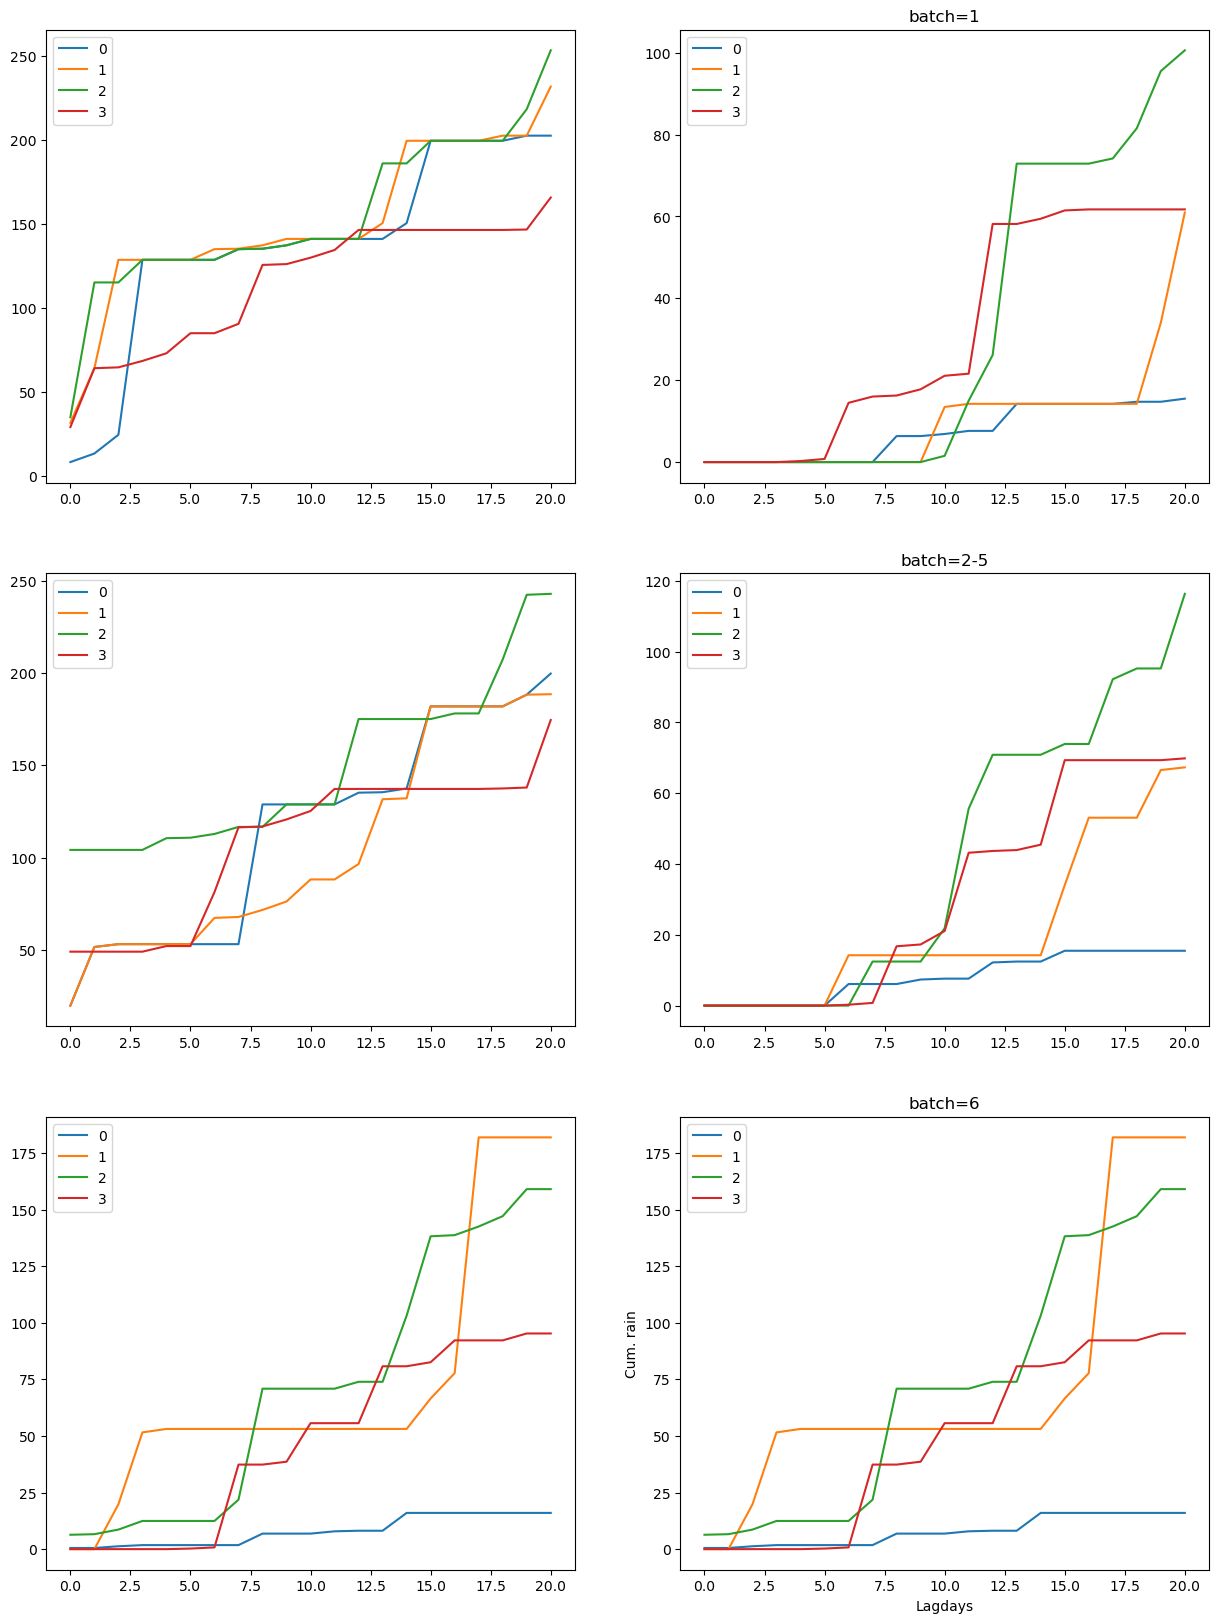

In [148]:
plots(thr2002)

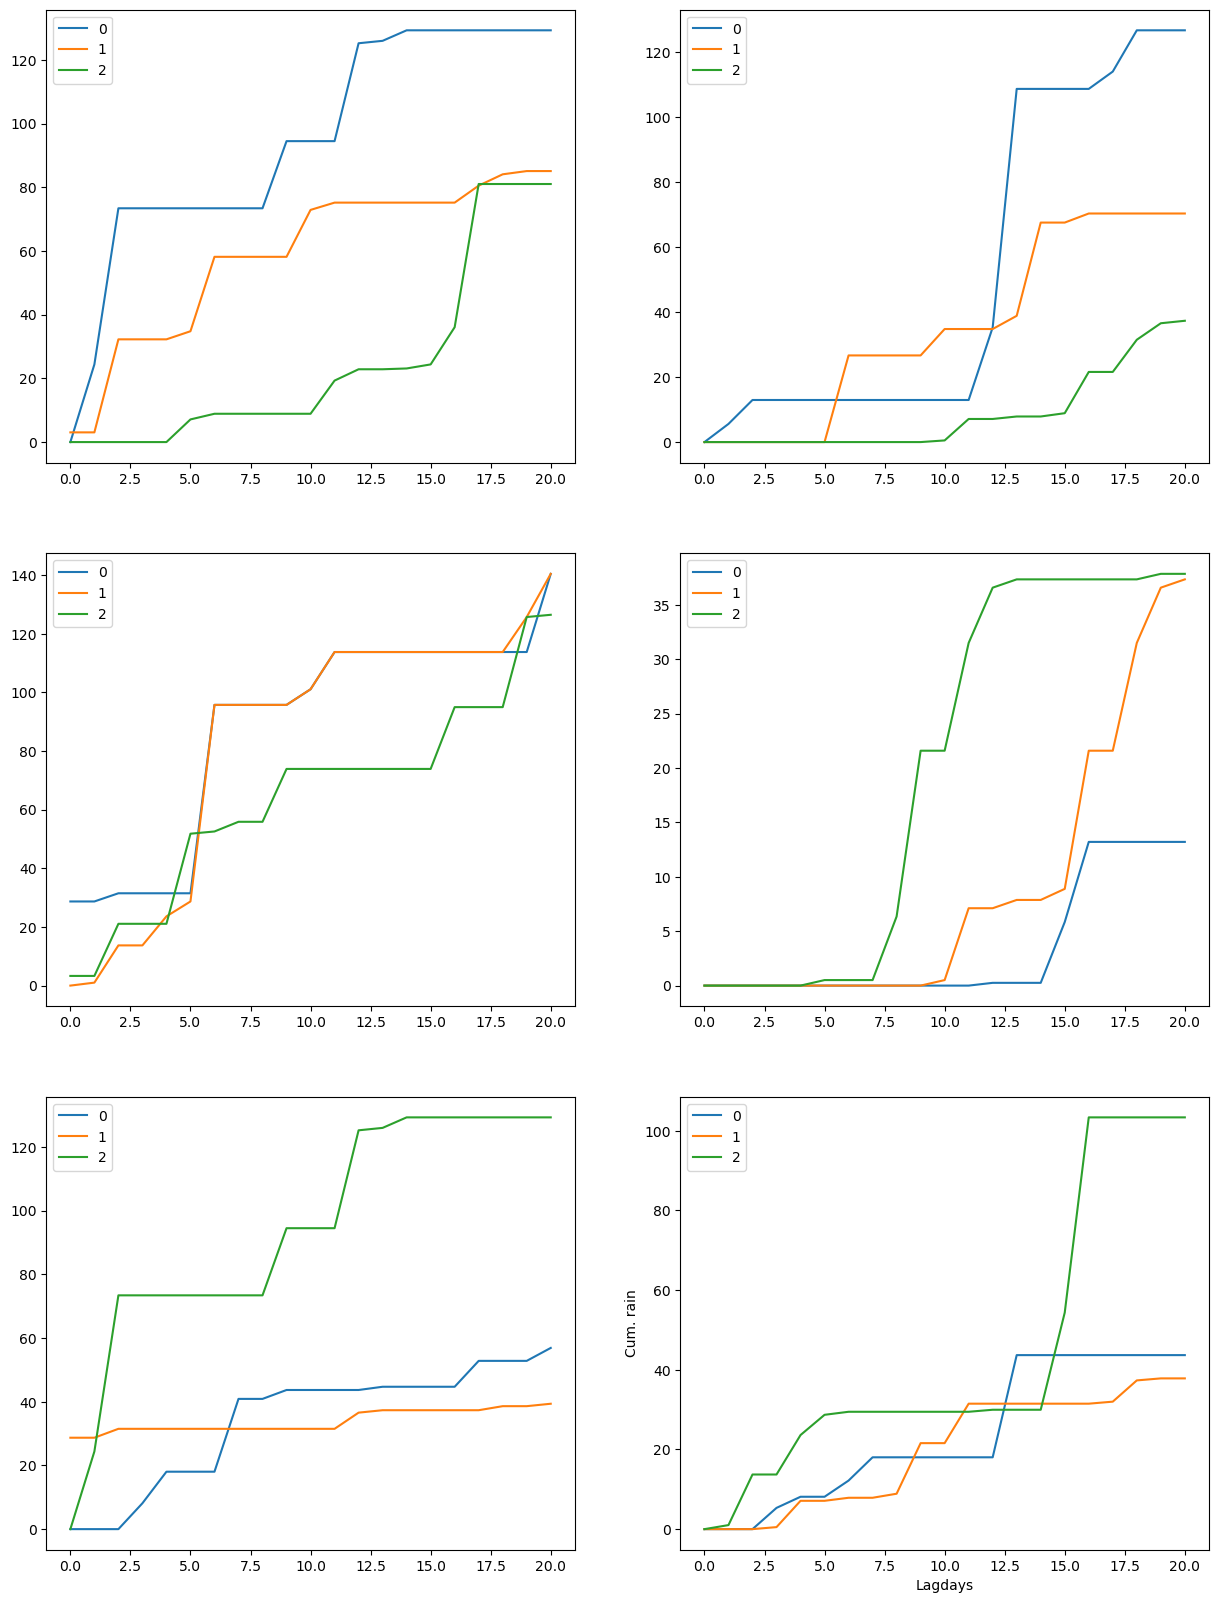

In [127]:
plots(thr2012)

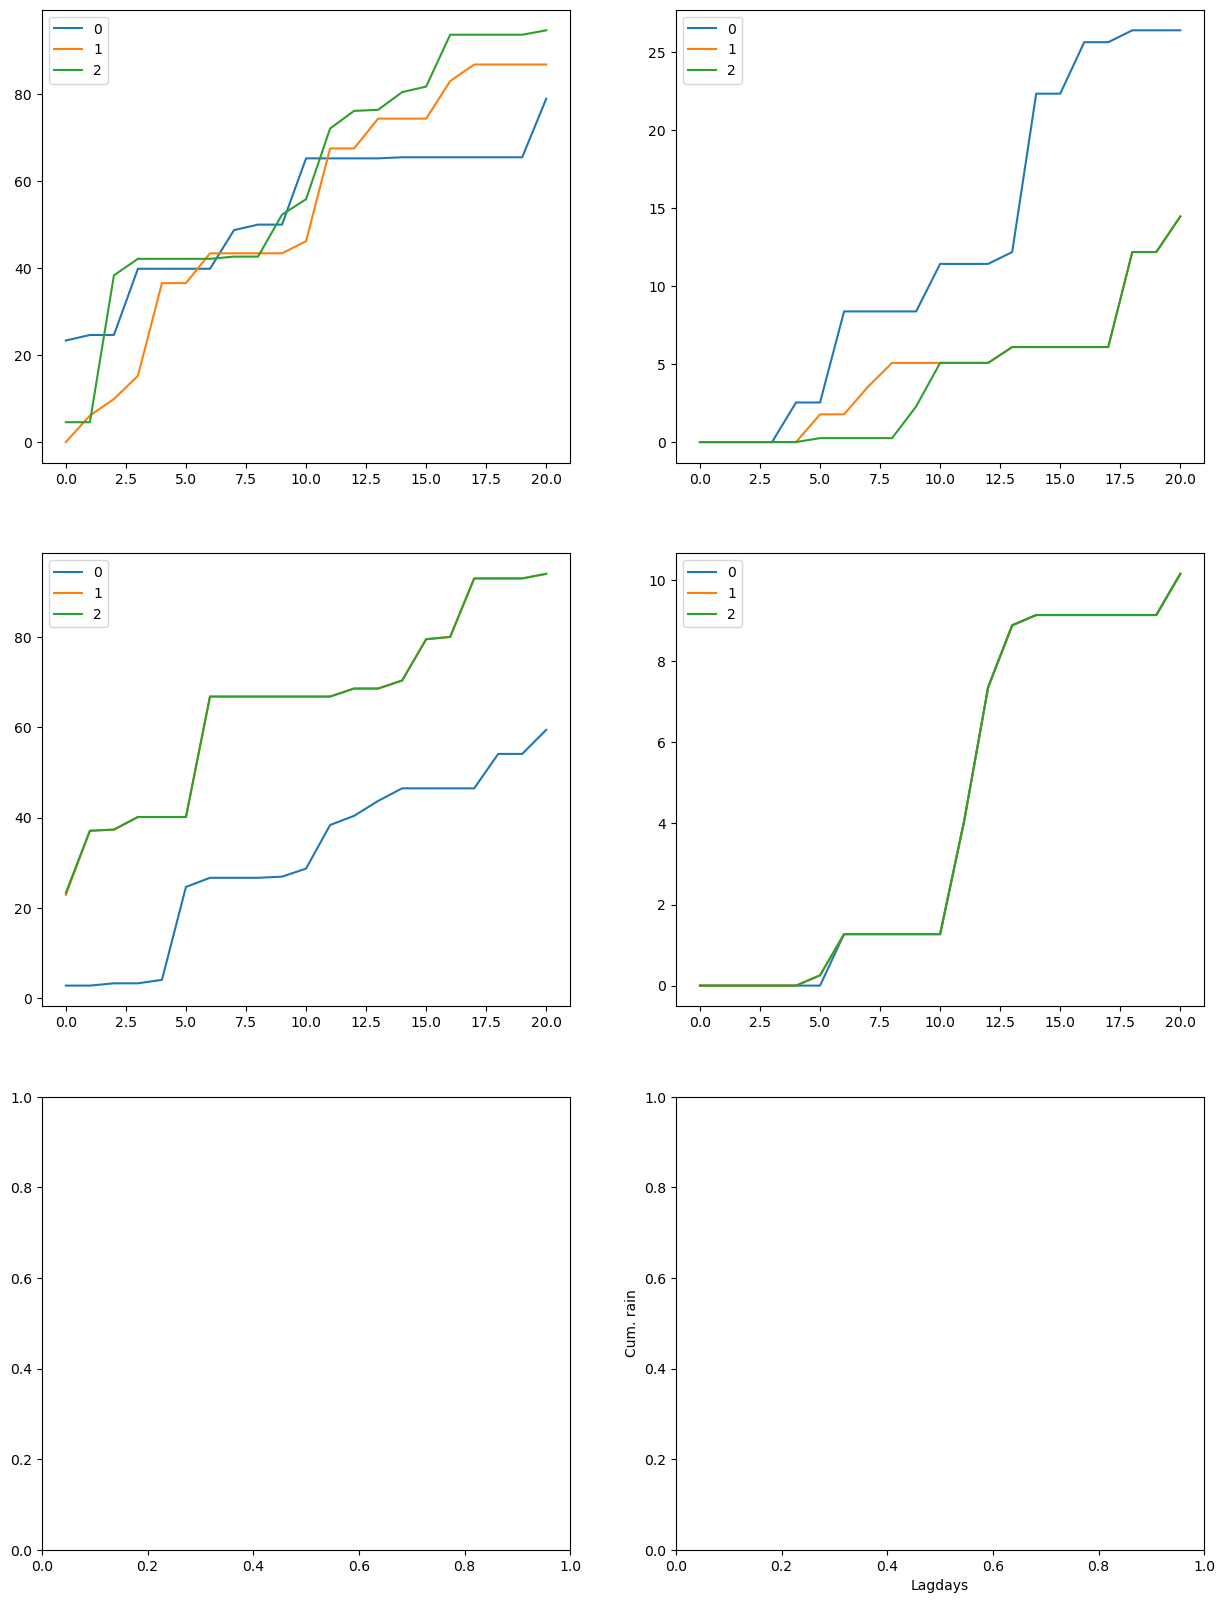

In [142]:
plots(thr2018)

In [39]:
#Adding columns of weekly sum of ppt lagging to the batch occurence
maxlagdf['cum7']=lagdf.iloc[:,1:8].sum(axis=1)*25.4
maxlagdf['cum7-14']=lagdf.iloc[:,8:15].sum(axis=1)*25.4
maxlagdf['cum14-21']=lagdf.iloc[:,15:22].sum(axis=1)*25.4

In [24]:
#upto 3 week cum ppt
maxlagdf['cum1']=lagdf.iloc[:,1:8].sum(axis=1)*25.4
maxlagdf['cum2']=lagdf.iloc[:,1:15].sum(axis=1)*25.4
maxlagdf['cum3']=lagdf.iloc[:,1:22].sum(axis=1)*25.4
maxlagdf['cum4']=lagdf.iloc[:,1:29].sum(axis=1)*25.4

In [25]:
lagdf

,batch,lag0,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag25,lag26,lag27,cum7,cum7-14,cum14-21,cum1,cum2,cum3,cum4
0,1,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.09,0.71,...,0.00,0.58,0.46,1.016,36.322,2.540,1.016,37.338,39.878,84.582
1,1,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.63,4.064,1.016,1.016,4.064,5.080,6.096,42.418
2,2,0.37,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,...,0.00,0.09,0.71,13.462,1.016,0.000,13.462,14.478,14.478,35.814
3,1,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.00,...,0.00,0.00,0.00,1.016,9.398,4.064,1.016,10.414,14.478,15.494
4,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.04,0.00,0.000,10.414,4.064,0.000,10.414,14.478,15.494
5,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.16,0.000,0.000,1.016,0.000,0.000,1.016,14.478
6,1,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,16.510,0.000,1.016,16.510,16.510,17.526,26.924
7,12,0.00,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,16.510,0.000,1.016,16.510,16.510,17.526,26.924
8,16,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.65,0.00,...,0.00,0.03,0.00,16.764,16.510,0.000,16.764,33.274,33.274,34.290
9,8,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,...,0.00,0.00,0.00,8.382,33.274,0.000,8.382,41.656,41.656,41.656


In [35]:
lagdf[lagdf['batch']==1]

,batch,lag0,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag25,lag26,lag27,cum7,cum7-14,cum14-21,cum1,cum2,cum3,cum4
0,1,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.09,0.71,...,0.0,0.58,0.46,1.016,36.322,2.540,1.016,37.338,39.878,84.582
1,1,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.04,...,0.0,0.00,0.63,4.064,1.016,1.016,4.064,5.080,6.096,42.418
3,1,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.00,...,0.0,0.00,0.00,1.016,9.398,4.064,1.016,10.414,14.478,15.494
6,1,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,16.510,0.000,1.016,16.510,16.510,17.526,26.924
10,1,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,...,0.0,0.00,0.00,8.382,16.764,16.510,8.382,25.146,41.656,41.656
13,1,2.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,51.816,8.382,33.274,51.816,60.198,93.472,93.472
14,1,0.00,0.00,0.04,2.04,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,52.832,0.000,25.146,52.832,52.832,77.978,94.488
15,1,0.19,3.23,0.06,0.00,0.00,0.00,0.04,2.04,0.00,...,0.0,0.00,0.65,89.408,51.816,8.382,89.408,141.224,149.606,182.880
22,1,0.02,0.01,0.00,0.00,0.00,0.87,0.03,0.04,0.34,...,0.0,0.28,0.00,23.622,9.652,22.606,23.622,33.274,55.880,68.326


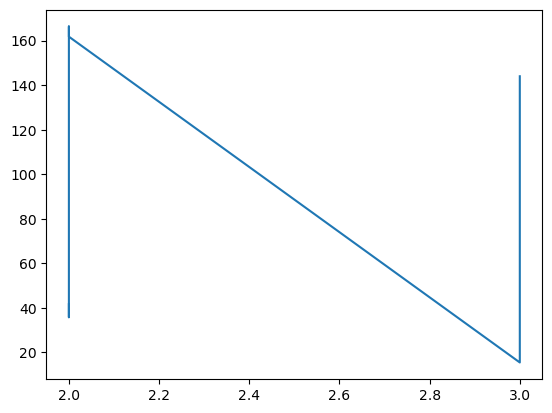

In [33]:
sordf =lagdf.sort_values(by='batch')
plt.plot(sordf[(sordf['batch']>=2)&(sordf['batch']<6)]['batch'],sordf[(sordf['batch']>=2)&(sordf['batch']<6)]['cum4'])

In [35]:
import scipy as sp
sp.spatial.distance.correlation(sordf['batch'],[*batch1ppt[14],*batch2_5ppt[14],*batch6ppt[14]])

1.2736986476194025

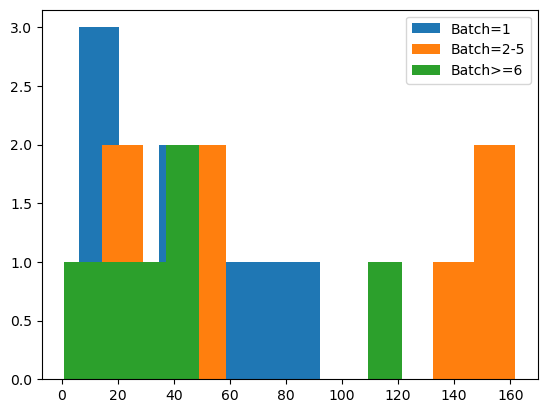

In [49]:
frqdistlagdays(1)